# Loading data

In [1]:
import pickle

with open("scanpaths.pkl", "rb") as f:
    scanpaths = pickle.load(f)

print(len(scanpaths), len(scanpaths[0]), len(scanpaths[0][0]), len(scanpaths[0][0][0]))
# n_sbj x n_img x n_coordinates x 2
# Third dimension variable in [653, 2440]

8 200 2021 2


# Classification

In [2]:
import numpy as np

distance_mm = 800
angle_deg = np.array([28, 21])

def get_screen_params():
    screen_size_mm = 2 * distance_mm * np.tan(np.deg2rad(angle_deg / 2))
    screen_res = np.asarray([1024, 768])
    return {'pix_per_mm': screen_res / screen_size_mm,
            'screen_dist_mm': distance_mm,
            'screen_res': screen_res}

gaze_sample_rate = 1000
screen_params = get_screen_params()

## Fixations

In [3]:
from classify_gaze_IVT import classify_raw_IVT

fixs = []

# For each subject, retrive fixation coordinates
for sbj in scanpaths:
    sbj_fixs = []
    for img in sbj:
        img_fixs, _ = classify_raw_IVT(img, gaze_sample_rate, screen_params)
        sbj_fixs.append(img_fixs)
    fixs.append(sbj_fixs)

In [4]:
print(len(fixs), len(fixs[0]), len(fixs[0][0]), len(fixs[0][0][0]), len(fixs[0][0][0][0]))
# n_sbj x n_img x n_fix x n_coord x 2

8 200 5 161 2


### Example: three fixations

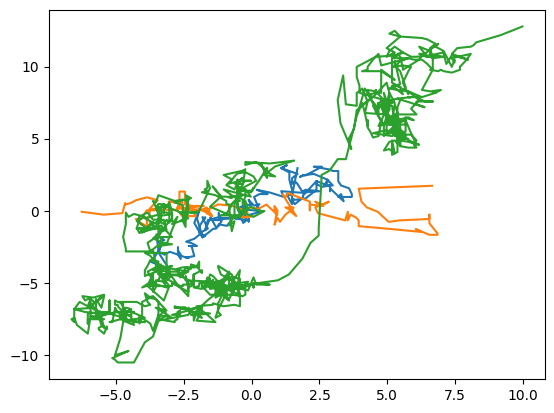

In [5]:
import matplotlib.pyplot as plt

a_fix = fixs[0][0][0]
plt.plot(a_fix[:, 0], a_fix[:, 1])
a_fix = fixs[0][0][1]
plt.plot(a_fix[:, 0], a_fix[:, 1])
a_fix = fixs[0][0][2]
plt.plot(a_fix[:, 0], a_fix[:, 1])

### Memorization

In [6]:
with open("fixs.pkl", "wb") as f:
    pickle.dump(fixs, f)

## Saccades

In [7]:
sacs = []

# For each subject, retrive fixation coordinates
for sbj in scanpaths:
    sbj_sacs = []
    for img in sbj:
        _, img_sacs = classify_raw_IVT(img, gaze_sample_rate, screen_params)
        sbj_sacs.append(img_sacs)
    sacs.append(sbj_sacs)

In [8]:
print(len(sacs), len(sacs[0]), len(sacs[0][0]), len(sacs[0][0][0]), len(sacs[0][0][0][0]))
# n_sbj x n_img x n_fix x n_coord x 2

8 200 4 43 2


### Example: three saccades

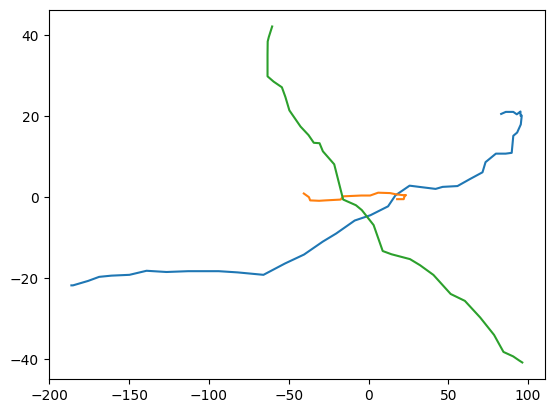

In [9]:
import matplotlib.pyplot as plt

a_sac = sacs[0][0][0]
plt.plot(a_sac[:, 0], a_sac[:, 1])
a_sac = sacs[0][0][1]
plt.plot(a_sac[:, 0], a_sac[:, 1])
a_sac = sacs[0][0][2]
plt.plot(a_sac[:, 0], a_sac[:, 1])

### Memorization

In [10]:
with open("sacs.pkl", "wb") as f:
    pickle.dump(sacs, f)